# Introduction

Language is one of the most fundamental aspects of human culture and identity, shaping communication, cognition, and social interactions. The World Atlas of Language Structures (WALS) offers a comprehensive database of linguistic properties drawn from descriptive materials across a diverse range of languages worldwide. With 2679 instances encompassing 202 columns, the dataset provides a rich resource for exploring the intricacies of linguistic diversity.

Taking a world-centric approach, we hope to explore the linguistic diversity beyond the commonly spoken languages. More than mere visualization of world languages on a map, we hope to explore specific features of languages and disprove some folk linguistic beliefs. For example, do tonal languages only exist in Asian countries? Are gender systems in language only sex based? Do languages in the same country share similar features?

### Overview and Major Findings:

The Wals visualization project is structured into four main sections:


1. **World Language Visualization**

This project comprises four sections, with the first focusing on World Language Visualization. Through this visualization, language data are mapped onto the world map using latitude and longitude information. Various map types, including sparsity and density maps, are employed to showcase the diversity and distribution of world languages. Languages are grouped based on their respective language families, with a simplified Indo-European language family tree also presented. The visualization reveals that Papua New Guinea stands out as the most linguistically diversified region globally, while the Niger-Congo language family emerges as the most linguistically rich. By delving into these insights, readers can gain a deeper understanding of the linguistic landscape across different regions and language families.
________________________________


2. **Language Feature Investigation: Tone** 

This section explores gender systems in languages across different macroareas and language families. It investigates the distribution of languages with gender systems, the relationship between the number of genders and the nature of the gender system, and gender distinctions in independent personal pronouns. The map visualization highlights the widespread distribution of gendered languages across Eurasia and Africa, with a concentration of languages with five or more genders in Central and South Africa, consistent with Niger-Congo language distribution. Additionally, the analysis reveals that sex-based gender systems predominantly have two or three genders, while non-sex-based systems are more prevalent in languages with five or more genders.

________________________________


3. **Language Feature Investigation: Gender**

This section delves into the investigation of gender systems in languages across different macroareas and language families. It explores the distribution of languages with gender systems, examines the relationship between the number of genders and whether the gender system is sex-based, and investigates gender distinctions in independent personal pronouns. The map visualization demonstrates that gendered languages are widely distributed across Eurasia and Africa, with a notable concentration of languages with five or more genders in Central and South Africa, consistent with the distribution of Niger-Congo languages. Furthermore, the analysis reveals that the majority of languages with sex-based gender systems have two or three genders, aligning with traditional notions of masculine and feminine distinctions. In contrast, non-sex-based gender systems are more prevalent in languages with five or more genders, challenging the assumption that gendered languages are solely based on biological sex.
________________________________

4. **A Closer Look at Languages within the US**

The final section examines the linguistic diversity within the United States, showcasing its rich tapestry of languages beyond English. A map displaying language families in the US reveals a cluster along the West Coast, reflecting the country's diverse linguistic heritage influenced by indigenous languages, immigration, and regional factors. Contrary to common assumptions, languages within the same country or region can vary significantly. This is exemplified through the analysis of syntactic structures and word order patterns, highlighting differences even within close proximity, such as in subject-object-verb (SOV) order and the order of adjectives and nouns.
________________________________

Install and import necessary packages:

In [1]:
pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [2]:
pip install lingpy


^C


In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data
import country_converter as coco
import librosa
import networkx as nx
from matplotlib import pyplot as plt

# World Language Visualization

Import the data:

In [2]:
lan = pd.read_csv('language.csv').convert_dtypes()

In [3]:
lan.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,aab,<NA>,<NA>,Arapesh (Abu),-3.45,142.95,Kombio-Arapesh,Torricelli,<NA>,PG,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,aar,aiw,aari1239,Aari,6.0,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,aba,aau,abau1245,Abau,-4.0,141.25,Upper Sepik,Sepik,Papunesia,PG,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,abb,shu,chad1249,Arabic (Chadian),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Prepare the data for visualization. We isolate specific columns from the dataframe, and group by family.

## Language Family
A language family is a group of different languages that all descend from a particular common language. The one language that generated those other languages in its family is known as a protolanguage.

For example, the Indo-European languages are a language family native to the overwhelming majority of Europe, the Iranian plateau, and the northern Indian subcontinent. Some European languages of this family—English, French, Portuguese, Russian, Dutch, and Spanish—have expanded through colonialism in the modern period and are now spoken across several continents.

### A Simplified Version of an Indo-European Language Family Tree

The following is a simplified version of a language family tree. A language tree is a graphical representation of the relationships between languages within a language family. It depicts the evolutionary history and classification of languages, showing how they are related to one another through common ancestry.

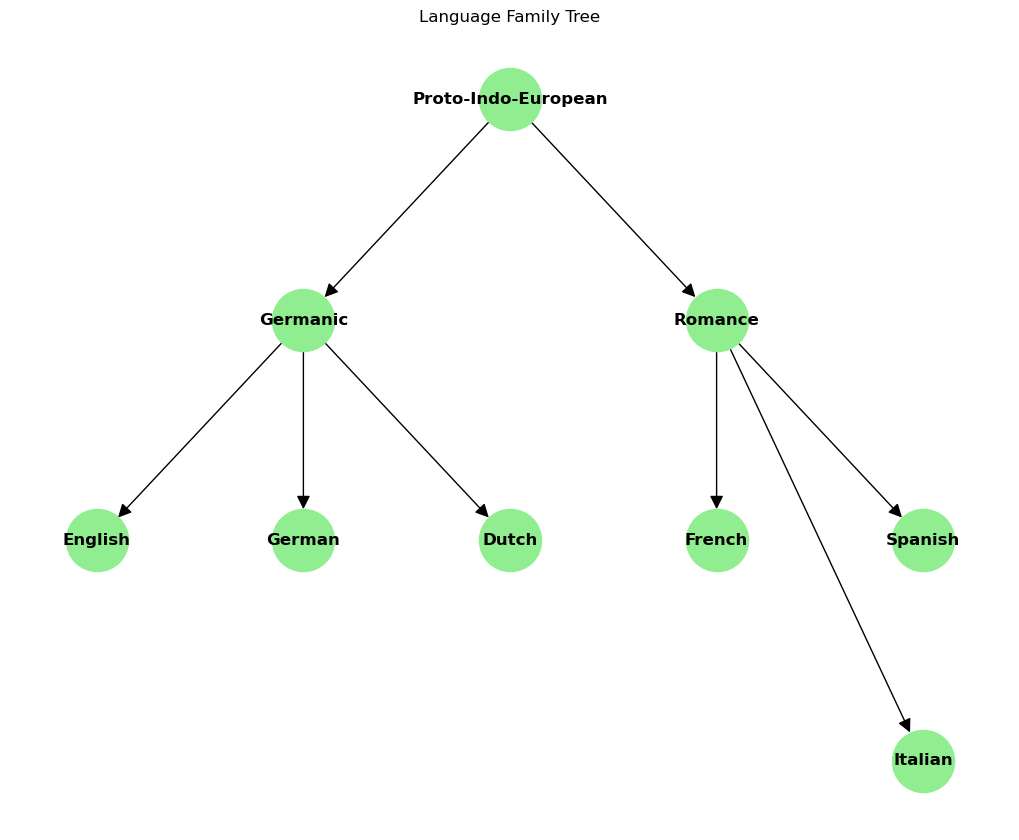

In [4]:
G = nx.DiGraph()

# Add nodes for languages
G.add_node("Proto-Indo-European")
G.add_node("Germanic")
G.add_node("Romance")
G.add_node("English")
G.add_node("German")
G.add_node("Dutch")
G.add_node("French")
G.add_node("Spanish")
G.add_node("Italian")

# Add edges to represent language relationships
G.add_edge("Proto-Indo-European", "Germanic")
G.add_edge("Proto-Indo-European", "Romance")
G.add_edge("Germanic", "English")
G.add_edge("Germanic", "German")
G.add_edge("Germanic", "Dutch")
G.add_edge("Romance", "French")
G.add_edge("Romance", "Spanish")
G.add_edge("Romance", "Italian")

# Specify positions for nodes
pos = {
    "Proto-Indo-European": (0, 0),
    "Germanic": (-1, -1),
    "Romance": (1, -1),
    "English": (-2, -2),
    "German": (-1, -2),
    "Dutch": (0, -2),
    "French": (1, -2),
    "Spanish": (2, -2),
    "Italian": (2, -3)
}

# Draw the language family tree
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgreen", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Language Family Tree")
plt.show()

### World Languages on a Map, grouped by Language Family

In [5]:
lan_location = lan[['Name','latitude','longitude','family']]
lan_location.head(10)

,Name,latitude,longitude,family
0,Arapesh (Abu),-3.45,142.95,Torricelli
1,Aari,6.0,36.583333,Afro-Asiatic
2,Abau,-4.0,141.25,Sepik
3,Arabic (Chadian),13.833333,20.833333,Afro-Asiatic
4,Abidji,5.666667,-4.583333,Niger-Congo
5,Arabic (Beirut),33.916667,35.5,Afro-Asiatic
6,Arabic (Bahrain),26.0,50.5,Afro-Asiatic
7,Abipón,-29.0,-61.0,Guaicuruan
8,Abkhaz,43.083333,41.0,Northwest Caucasian
9,Alabama,32.333333,-87.416667,Muskogean


In [6]:
print("Number of Unique Language Families:")
len(pd.unique(lan_location['family']))

Number of Unique Language Families:


256

In [7]:
# https://altair-viz.github.io/altair-tutorial/notebooks/09-Geographic-plots.html
countries = alt.topo_feature(data.world_110m.url, 'countries')

background = alt.Chart(countries).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project(
    "equirectangular"
).properties(
    width=900,
    height=550
)

points = alt.Chart(lan_location).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    color='family',
    size=alt.value(25),
    tooltip='Name'
)

background + points

alt.LayerChart(...)

### Density Map of Language Family

In [8]:
lan_count = (lan[['Name','family','latitude','longitude']]
             .dropna()
             .groupby('family')
             .agg({'Name':'size', 'latitude':'mean', 'longitude':'mean'})
             .rename(columns={'Name':'count'})
             .sort_values('count', ascending=False)
             .reset_index()
            )
lan_count.head(20)

,family,count,latitude,longitude
0,Niger-Congo,327,1.813282,12.779847
1,Austronesian,325,-2.659282,125.200154
2,Indo-European,176,40.633996,35.137027
3,Sino-Tibetan,149,27.162528,92.431544
4,Afro-Asiatic,145,15.560319,25.7108
5,Pama-Nyungan,122,-22.946967,136.589727
6,Trans-New Guinea,88,-6.119318,144.314583
7,other,72,17.620833,23.968519
8,Altaic,65,46.504359,83.46359
9,Oto-Manguean,56,17.61756,-97.495238


In [9]:
macro = alt.Chart(lan_count).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    color='family',
    size=alt.Size('count'),
    tooltip='family'
)
background + macro

alt.LayerChart(...)

### Count Graph of Language Family Density
As we can see below, Niger-Congo is the largest language family. The languages of the Niger-Congo family are primarily spoken in Sub-Saharan Africa, covering a vast geographical area from West Africa to Central, East, and Southern Africa.

Swahili, also known as Kiswahili, is a Bantu language spoken by millions of people in East Africa, particularly in countries such as Kenya, Tanzania, Uganda, and the Democratic Republic of the Congo. It serves as a lingua franca in the region and is one of the official languages of the African Union.

Another well-known langauge in this family is Zulu. Zulu is a Bantu language spoken by millions of people in South Africa, particularly in the province of KwaZulu-Natal. It is one of the 11 official languages of South Africa and is known for its distinctive click consonants, which are an integral part of the language's phonology.
This youtube video shows a Zulu speaker demonstrating the click consonants:
https://www.youtube.com/watch?v=WHHGOYu6Fl0



In [10]:
# https://altair-viz.github.io/altair-viz-v4/gallery/bar_chart_with_labels.html
# language families ranking by count of languages
lan_count_filter = lan_count.iloc[:15]

bars = alt.Chart(lan_count_filter).mark_bar().encode(
    x='count',
    y=alt.Y('family:N', sort='-x')
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='count:Q'
)

(bars + text)

alt.LayerChart(...)

### Languages by Macroarea

Divided based on:
1. Eurasia
2. Africa
3. Papunesia
4. North America
5. South America
6. Australia

In [11]:
lan_macro = (lan[['Name','macroarea']]
             .dropna()
             .groupby('macroarea')
             .agg({'Name':'size'})
             .rename(columns={'Name':'count'})
             .sort_values('count', ascending=False)
             .reset_index()
            )
print("Table of the total number of languages by macroarea, desc:")
lan_macro

Table of the total number of languages by macroarea, desc:


,macroarea,count
0,Eurasia,660
1,Africa,607
2,Papunesia,558
3,North America,398
4,South America,257
5,Australia,177


In [12]:
bars = alt.Chart(lan_macro).mark_bar().encode(
    x='count',
    y=alt.Y('macroarea:N', sort='-x')
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='count:Q'
)

print("Bar Chart of the total number of languages by macroarea, desc:")
(bars + text)

Bar Chart of the total number of languages by macroarea, desc:


alt.LayerChart(...)

In [13]:
# Language dataframe transformed into tidy format
lan_tidy = (pd
            .melt(
                lan,
                id_vars = ['wals_code','Name'],
                value_vars = lan.columns[10:],
                var_name = 'feature',
                value_name = 'type')
            .dropna()
            .reset_index()
            .sort_values('wals_code')
           )

In [14]:
lan_tidy.head()

,index,wals_code,Name,feature,type
38605,233073,aab,Arapesh (Abu),88A Order of Demonstrative and Noun,2 Noun-Demonstrative
46745,257184,aab,Arapesh (Abu),97A Relationship between the Order of Object a...,4 VO and NAdj
67417,433998,aab,Arapesh (Abu),144B Position of negative words relative to be...,"6 End, not immed postverbal"
66971,431319,aab,Arapesh (Abu),144K SVONeg Order,1 NoDoubleNeg
73220,479541,aab,Arapesh (Abu),143G Minor morphological means of signaling ne...,4 None


### World Languages on a Map, grouped by Country

As we can see below, the region in the world with the most linguistic diversity is Papua New Guinea. Different social factors may contribute to this diversity. One of the reasons to keep in mind is the Geographic Isolation of the area. Papua New Guinea is located on the eastern half of the island of New Guinea, which is one of the most geographically diverse regions in the world. The rugged terrain, dense rainforests, and mountainous landscapes have historically led to the isolation of communities, allowing languages to develop independently from one another.

In [15]:
lan_cc = lan[['Name','countrycodes','macroarea']].dropna()
lan_cc['countrycodes'] = lan_cc['countrycodes'].apply(lambda x: x.split(' '))
lan_cc = lan_cc.explode('countrycodes')

In [16]:
# conver countrycodes to country names
cc = coco.CountryConverter()
lan_cc['country'] = cc.pandas_convert(series=lan_cc.countrycodes, to='name_short')

VR not found in ISO2
AN not found in ISO2


In [17]:
test = (lan_cc
        .groupby(['country'])
        .agg({'country':'size'})
        .rename(columns={'country':'count'})
        .sort_values('count', ascending=False)
        .reset_index()
       )
test_1 = test.iloc[:20]
print("Table of the total number of languages by country, desc:")
test_1.head(10)

Table of the total number of languages by country, desc:


,country,count
0,Papua New Guinea,217
1,United States,192
2,Indonesia,181
3,Australia,179
4,India,140
5,Mexico,126
6,Russia,98
7,Brazil,93
8,Nigeria,81
9,China,73


In [18]:
# https://altair-viz.github.io/altair-viz-v4/gallery/bar_chart_with_labels.html
# language counts ranking by country

bars1 = alt.Chart(test_1).mark_bar().encode(
    x='count',
    y=alt.Y('country:N', sort='-x')
)
text1 = bars1.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='count:Q'
)

print("Bar Chart of the total number of languages by country, desc:")
(bars1 + text1)

Bar Chart of the total number of languages by country, desc:


alt.LayerChart(...)

# Tone

In linguistics, pitch plays a crucial role in conveying meaning in spoken language, and it is commonly categorized into two major uses: tone and intonation.

Intonation refers to the use of pitch patterns in speech to convey various aspects of utterances, such as sentence types (e.g., question versus statement), speech boundaries (e.g., indicating the end or continuation of speech), and information structure (e.g., highlighting new or old information). It operates at the level of phrases, sentences, and discourse, rather than individual words.

On the other hand, tone refers to the use of pitch patterns to distinguish individual words or grammatical forms within words. In languages with tone systems, each syllable typically carries its own characteristic tonal pattern, which may consist of flat pitch levels or contour tones involving rising or falling pitch patterns. Tone serves to differentiate lexical meanings and grammatical functions, such as singular versus plural forms of nouns or different verb tenses.

Many languages in East and Southeast Asia, such as Chinese, Vietnamese, and Thai, feature tone systems with contour tones, where the pitch contour of syllables distinguishes lexical or grammatical meanings. For example, in Thai, the syllable /kʰaa/ can correspond to five different words depending on its tone, demonstrating the importance of pitch patterns in conveying meaning.

While contour tones are more prevalent in languages with a larger number of tone distinctions, some languages, like Yoruba and Navajo, exhibit lexical distinctions between a smaller set of level tones. These examples highlight the diverse ways in which tone is utilized across different language families and geographical regions, underscoring its significance in linguistic communication.







### Visualizing the Chinese Tonal System

The tonal system is a defining feature of many languages, including Chinese. In Mandarin Chinese, each syllable is associated with a specific pitch contour or tone, which can alter the meaning of words.

The Fundamental Frequency, (f0) of speech signals varies across different tones. By plotting out the four tones in Chinese, we explore how f0 differs across tones, providing insights into the distinctive pitch patterns that characterize Mandarin Chinese.

The following four audio files are recording of the pronuncaition of [i] in four tones:

1. Flat Tone
2. Rising Tone
3. Falling and then Rising Tone
4. Falling Tone

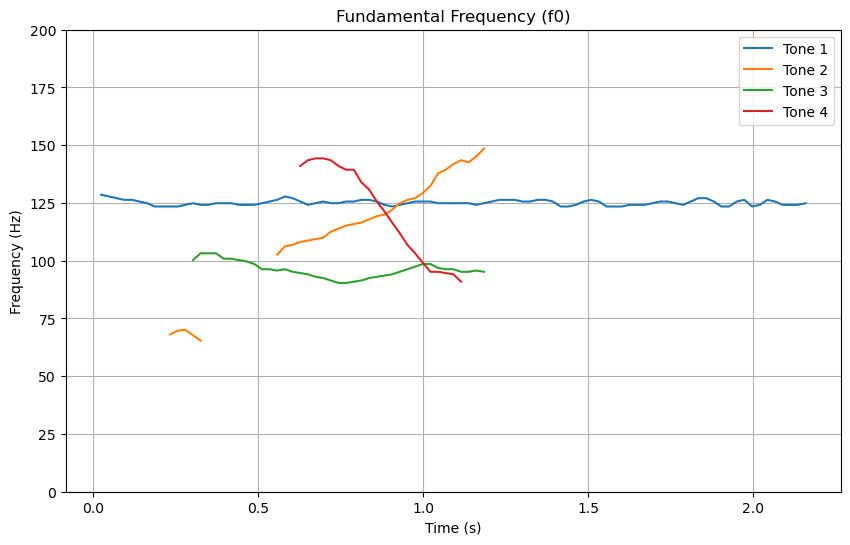

In [19]:
# Function to compute f0
def compute_f0(audio_file):
    y, sr = librosa.load(audio_file)
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    return f0

# List of audio files
audio_files = ['tone1.wav', 'tone2.wav', 'tone3.wav', 'tone4.wav']

# Compute f0 for each audio file
f0_list = [compute_f0(audio_file) for audio_file in audio_files]

# Plot f0 for all audio files
plt.figure(figsize=(10, 6))
for i, f0 in enumerate(f0_list):
    plt.plot(librosa.times_like(f0), f0, label=f'Tone {i+1}')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fundamental Frequency (f0)')
plt.grid()
plt.ylim(0, 200)  # Adjust y-axis limits if necessary
plt.legend()
plt.show()

As we can see in the graph of f0 and time, the plot aligns with our intrinsic understanding of the Chinese tone systems. Tone 1 is mostly flat and is the longest because phonologically, a speaker can hold a flat tone the longest, as compared to a falling or rising tone. Tone 2 rises, roughly from 100 Hz to 150 Hz. Tone 3 shows a dip in pitch. Tone 4 is a falling tone and shows a smooth drop in f0 overtime.

### Languages with tone systems by macroarea

In [20]:
# We first isolate the Tone feature, dropNA, and count each tone.
lan_tone = lan[['Name','latitude','longitude', 'macroarea', 'countrycodes', '13A Tone']].dropna()
lan_tone.head(25)

,Name,latitude,longitude,macroarea,countrycodes,13A Tone
8,Abkhaz,43.083333,41.0,Eurasia,GE,1 No tones
21,Achumawi,41.5,-121.0,North America,US,2 Simple tone system
23,Acoma,34.916667,-107.583333,North America,US,3 Complex tone system
28,Andoke,-0.666667,-72.0,South America,CO,2 Simple tone system
33,Aleut (Eastern),54.75,-164.0,North America,US,1 No tones
34,Arabic (Egyptian),30.0,31.0,Africa,EG,1 No tones
41,Aghem,6.666667,10.0,Africa,CM,2 Simple tone system
51,Ahtna,62.0,-145.0,North America,US,1 No tones
53,Aikaná,-12.666667,-60.666667,South America,BR,2 Simple tone system
54,Ainu,43.0,143.0,Eurasia,JP,2 Simple tone system


In [21]:
# Dropping rows with missing values in '13A Tone' and grouping by 'macroarea'
lan_grouped = lan.dropna(subset=['13A Tone']).groupby(['macroarea', '13A Tone']).size().reset_index(name='count')

# Display the pivoted DataFrame
print("Count of Tone systems in languages grouped by macroarea:")
lan_grouped.head(10)

Count of Tone systems in languages grouped by macroarea:


,macroarea,13A Tone,count
0,Africa,1 No tones,15
1,Africa,2 Simple tone system,68
2,Africa,3 Complex tone system,44
3,Australia,1 No tones,31
4,Eurasia,1 No tones,93
5,Eurasia,2 Simple tone system,17
6,Eurasia,3 Complex tone system,28
7,North America,1 No tones,53
8,North America,2 Simple tone system,21
9,North America,3 Complex tone system,10


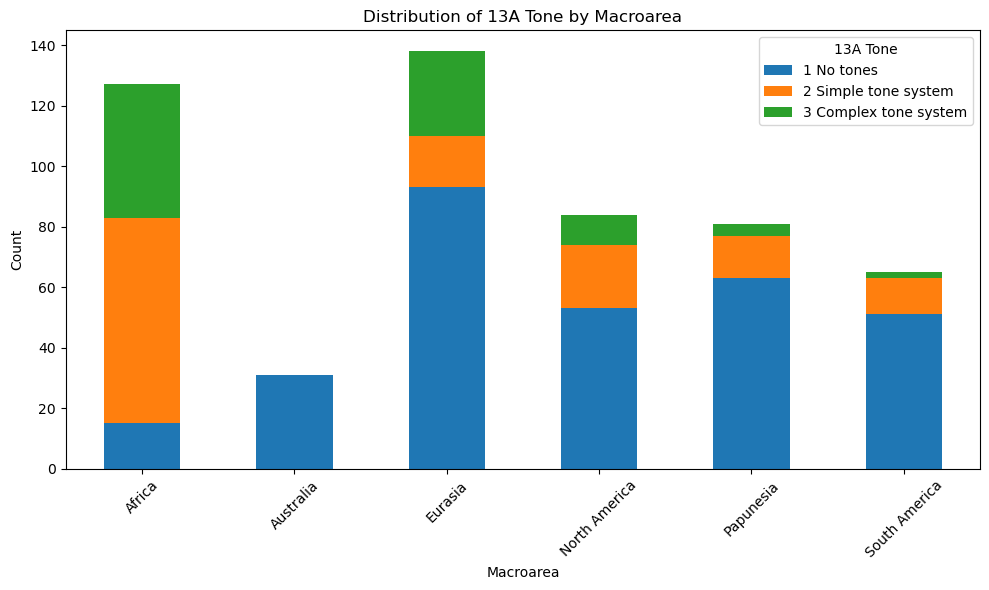

In [22]:
pivot_df = lan_grouped.pivot(index='macroarea', columns='13A Tone', values='count')

# Plot stacked bar graph
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of 13A Tone by Macroarea')
plt.xlabel('Macroarea')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='13A Tone')
plt.tight_layout()
plt.show()

According to the macroarea stacked bar chart, the commonly held belief that tonal languages only exist in Asian is not necessarily true. We see more tonal languages in Africa, and an equal amount in North America, Papuneisa, and South America as well. It is to note that Australia doesn't have any tonal languages.

In [23]:
row_percentages = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Round the percentages to 2 decimal places
row_percentages_rounded = row_percentages.round(2)

# Concatenate the original pivot_df with the rounded row_percentages DataFrame
contingency_table = row_percentages_rounded.add_suffix('_percentage')

# Display the contingency table
print("Contingency Table of percentage:")
print(contingency_table)

Contingency Table of percentage:
13A Tone       1 No tones_percentage  2 Simple tone system_percentage  \
macroarea                                                               
Africa                         11.81                            53.54   
Australia                     100.00                              NaN   
Eurasia                        67.39                            12.32   
North America                  63.10                            25.00   
Papunesia                      77.78                            17.28   
South America                  78.46                            18.46   

13A Tone       3 Complex tone system_percentage  
macroarea                                        
Africa                                    34.65  
Australia                                   NaN  
Eurasia                                   20.29  
North America                             11.90  
Papunesia                                  4.94  
South America                   

### Distributions of Tonal Languages on the World Map

In [24]:
# Create background map
background = alt.Chart(alt.topo_feature('https://vega.github.io/vega-datasets/data/world-110m.json', 'countries')).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project(
    "equirectangular"
).properties(
    width=700,
    height=600
)

points = alt.Chart(lan_tone).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color=alt.Color('13A Tone:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e', '#2ca02c']), title='Tone'),
    size=alt.value(40),
    tooltip='13A Tone'
)


background + points

alt.LayerChart(...)

### Relationship between Tone and Syllable Structure

The relationship between tone and syllable structure can vary widely across languages. In some languages, such as Mandarin Chinese, each syllable carries a specific tone, and the tone pattern can be independent of the syllable structure. For example, in Mandarin, the syllable /ma/ can have different meanings depending on its tone: /mā/ (妈) means "mother," /má/ (麻) means "hemp," /mǎ/ (马) means "horse," and /mà/ (骂) means "scold."

In other languages, the tone may be influenced by the syllable structure. For instance, in some African languages with complex syllable structures, the tone of a syllable may be affected by factors such as the number and type of consonants or the presence of certain vowel combinations.

Canonical syllable patterns are most often represented as a string of C and V symbols, where C stands for a Consonant and V for a Vowel sound (including any complex vowel elements such as diphthongs which might occur in the language). The Syllable Structure is defined as follows:

1. Simple: CV
2. Moderately Complex: CCVC
3. Complex: CCCVCCCC

In this section, we investigate the patterns between tonal langauges and their syllable structure.

In [25]:
tone_syllable = (lan[['12A Syllable Structure', '13A Tone']]
                  .dropna()
                  .groupby(['12A Syllable Structure', '13A Tone'])
                  .size()
                  .reset_index(name='count'))

print("Count of Languages, grouped by Syllable Structure and Tone:")
print("______________________________________________")
tone_syllable


Count of Languages, grouped by Syllable Structure and Tone:
______________________________________________


,12A Syllable Structure,13A Tone,count
0,1 Simple,1 No tones,28
1,1 Simple,2 Simple tone system,21
2,1 Simple,3 Complex tone system,11
3,2 Moderately complex,1 No tones,135
4,2 Moderately complex,2 Simple tone system,75
5,2 Moderately complex,3 Complex tone system,58
6,3 Complex,1 No tones,113
7,3 Complex,2 Simple tone system,23
8,3 Complex,3 Complex tone system,8


In [26]:
# Calculate total counts for each tone category
total_counts = tone_syllable.groupby('12A Syllable Structure')['count'].transform('sum')

# Calculate percentages
tone_syllable['percentage'] = (tone_syllable['count'] / total_counts) * 100

# Display the DataFrame with percentages
print("Percentage Table of Languages, grouped by Syllable Structure and Tone::")
print("__________________________________________________________________")
print(tone_syllable)


Percentage Table of Languages, grouped by Syllable Structure and Tone::
__________________________________________________________________
  12A Syllable Structure               13A Tone  count  percentage
0               1 Simple             1 No tones     28   46.666667
1               1 Simple   2 Simple tone system     21   35.000000
2               1 Simple  3 Complex tone system     11   18.333333
3   2 Moderately complex             1 No tones    135   50.373134
4   2 Moderately complex   2 Simple tone system     75   27.985075
5   2 Moderately complex  3 Complex tone system     58   21.641791
6              3 Complex             1 No tones    113   78.472222
7              3 Complex   2 Simple tone system     23   15.972222
8              3 Complex  3 Complex tone system      8    5.555556


### Grouped Bar Chart of Tones and Syllable Structure

In [27]:
alt.Chart(tone_syllable).mark_bar().encode(
    facet=alt.Facet('12A Syllable Structure'),
    x='13A Tone:O',
    y='count:Q',
    color='13A Tone:N'
)

alt.Chart(...)

One pattern to note from the chart is that the tonal languages tend to have a simple syllable structure. As the syllable structure becomes more intricate, there appears to be a decrease in the prevalence of tonal languages.

# Gender


Gender system is one of the interesting features in languages around the world. When talking about languages that have a gender system, we might often relate to the European languages like French and German, which have gendered nouns as masculine or feminine (or neutral). With the more globalized data we have here, we want to investigate whether the gender systems in European languages are the most representative. Also, when we have the impression of gender systems in European languages, it is easy to connect the grammatical gender system to the actual sexes, such as how masculine nouns represent masculine things. We want to discover whether grammatical gender is wholey based on sex or it is not the only case.

### General Distribution of Gendered Language

First, we want to discover the general distribution of languages with gender systems acroos the macroareas they are located in. With the WALS data we have, we first select the languages that have their Number of Genders features recorded. We also filtered out the languages that are recorded to have no gender system as they are not very helpful in the analysis and visualization.

In [28]:
# Extract the information from the data and remove ones without recorded data on number of genders
lan_gender = lan[['Name','latitude','longitude','family', 'macroarea', '30A Number of Genders']].dropna()
lan_gender = lan_gender.loc[lan_gender['30A Number of Genders'] != '1 None']

In [29]:
lan_gender.head()

,Name,latitude,longitude,family,macroarea,30A Number of Genders
8,Abkhaz,43.083333,41.0,Northwest Caucasian,Eurasia,3 Three
11,Arbore,5.0,36.75,Afro-Asiatic,Africa,2 Two
34,Arabic (Egyptian),30.0,31.0,Afro-Asiatic,Africa,2 Two
48,Alagwa,-5.5,35.75,Afro-Asiatic,Africa,2 Two
70,Alamblak,-4.666667,143.333333,Sepik,Papunesia,2 Two


To discover the distribution according to macroarea, we would group the data by the macroarea and number of genders to discover the counts for each group.

In [30]:
# group by language family and number of genders to get the count of each group
test_gender = (lan_gender
               .groupby(['macroarea', '30A Number of Genders'])
               .size()
               .reset_index(name='count')
       )

In [31]:
test_gender

,macroarea,30A Number of Genders,count
0,Africa,2 Two,16
1,Africa,3 Three,4
2,Africa,4 Four,2
3,Africa,5 Five or more,16
4,Australia,2 Two,3
5,Australia,3 Three,2
6,Australia,4 Four,3
7,Australia,5 Five or more,3
8,Eurasia,2 Two,17
9,Eurasia,3 Three,13


From the data we transformed, we use a stacked bar chart to display the languages by their macroarea.

In [32]:
alt.Chart(test_gender).mark_bar().encode(
    x='macroarea',
    y='count',
    color='30A Number of Genders'
)

alt.Chart(...)

From the above graph, we can see that although many languages in Eurasia have gender system, Africa has the most number of languages that have gender systems. Apart from the total count, we can also see that languages with five or more genders are highly distributed in Africa compared to other macroareas, and most languages in Eurasia posses two or three genders, which is consistent with examples like French and German.

### Gendered Language by Language Families

Apart from the general geographical distribution, we would also want to see if the language families have different distributions of number of genders. Therefore we would transform the data again by grouping on the language family and number of genders.

In [33]:
# group by language family and number of genders to get the count of each group
family_gender = (lan_gender
               .groupby(['family', '30A Number of Genders'])
               .size()
               .reset_index(name='count')
       )
family_gender.head()

,family,30A Number of Genders,count
0,Afro-Asiatic,2 Two,20
1,Algic,2 Two,3
2,Arauan,4 Four,1
3,Arawakan,2 Two,2
4,Austro-Asiatic,2 Two,3


In [34]:
alt.Chart(family_gender).mark_bar().encode(
    x=alt.X('family', sort='-y'),
    y='count',
    color='30A Number of Genders'
)

alt.Chart(...)

From the specification of families, we see that for the languages with five or more genders, they are mainly from niger-congo languages, which are mostly located in Central and South Africa. Afro-Asiatic languages (North Africa) and Niger-congo languages are quite different from each other in terms of number of genders, as Afro-Asiatic languages only have two genders. Indo-European languages have two or three genders, also consistent with the Eurasian languages we discovered in above sections.

### World Map of Gendered Languages, grouped by Number of Genders

In [35]:
points_gender = alt.Chart(lan_gender).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    color='30A Number of Genders',
    size=alt.value(100),
    tooltip='Name'
)

background+points_gender

alt.LayerChart(...)

Here we can observe on the map that most gendered languages are in Eurasia and Africa, with the five-or-more-genders languages mainly distributed at Central and South Africa, which corresponds to the Niger-Congo languages.

### Combining Number of Genders and if the System is sex-based

In addition to the investigation on the distribution of gendered languages, we want to invetigate the relationships between the number of genders in languages with other features, such as if the gender system is sex-based or not. From the WALS data, we identified that some languages have gender systems that are non-sex-based, so we would extract the two features from the data.

In [36]:
lan_gender_sex = lan[['Name', '30A Number of Genders','31A Sex-based and Non-sex-based Gender Systems']].dropna()
lan_gender_sex = lan_gender_sex.loc[lan_gender_sex['30A Number of Genders'] != '1 None']
lan_gender_sex.head()

,Name,30A Number of Genders,31A Sex-based and Non-sex-based Gender Systems
8,Abkhaz,3 Three,2 Sex-based
11,Arbore,2 Two,2 Sex-based
34,Arabic (Egyptian),2 Two,2 Sex-based
48,Alagwa,2 Two,2 Sex-based
70,Alamblak,2 Two,2 Sex-based


In [37]:
gender_sex = (lan_gender_sex
                  .rename(columns={'30A Number of Genders':'NumberofGenders'})
                  .groupby(['NumberofGenders', '31A Sex-based and Non-sex-based Gender Systems'])
                  .size()
                  .reset_index(name='count')
                 )
gender_sex

,NumberofGenders,31A Sex-based and Non-sex-based Gender Systems,count
0,2 Two,2 Sex-based,43
1,2 Two,3 Non-sex-based,7
2,3 Three,2 Sex-based,22
3,3 Three,3 Non-sex-based,4
4,4 Four,2 Sex-based,11
5,4 Four,3 Non-sex-based,1
6,5 Five or more,2 Sex-based,8
7,5 Five or more,3 Non-sex-based,16


In [38]:
table = pd.crosstab(
    lan_gender_sex['30A Number of Genders'],
    lan_gender_sex['31A Sex-based and Non-sex-based Gender Systems'],
    normalize=True
)
table

31A Sex-based and Non-sex-based Gender Systems,2 Sex-based,3 Non-sex-based
30A Number of Genders,,
2 Two,0.383929,0.062500
3 Three,0.196429,0.035714
4 Four,0.098214,0.008929
5 Five or more,0.071429,0.142857


From the two features, we created a contingency table for the distribution of number of genders in sex-based and non-sex-based gender systems. We can see that for sex-based gender systems, most languages have two or three genders. For the non-sex-based gender systems, the largest portion is the languages with five or more genders. Below we also have a side-by-side bar chart to display this general trend for the two systems.

In [39]:
alt.Chart(gender_sex).mark_bar().encode(
    facet=alt.Facet('31A Sex-based and Non-sex-based Gender Systems'),
    x='NumberofGenders',
    y='count',
    color='NumberofGenders'
)

alt.Chart(...)

As the bar chart displays, it is reasonable to think that gendered languages have sex-based systems as the most languages in that category have two or three genders, which might correspond to masculine and feminine (and neutral). But for the non-sex-based gender systems, the largest portion is languages with five or more genders, which can hardly be corresponded to actual sexes. We see in these analysis that gendered languages are not necessarily sex-based.

### Number of genders and gender distinctions in independent personal pronouns in gendered languages

Another feature that might be related to the number of genders in languages is the gender distinctions in independent personal pronouns. For this feature we have data on which of the pronouns (1st, 2nd, 3rd person, singular or plural) have distinctions by gender, for example he/she in english is a distinction between genders in 3rd person singular pronouns. In below we filter out the data and visulized the counts by stacked bar charts. The languages with no genders are also filtered out for simplicity and our focus on languages with actual gendered systems.

In [40]:
# Extract the number of genders and sex-based or not features for the languages and remove those without recorded data
gender_pronoun = (lan[['30A Number of Genders', '44A Gender Distinctions in Independent Personal Pronouns']]
                  .dropna()
                  .rename(columns={'30A Number of Genders':'NumberofGenders'})
                  .groupby(['NumberofGenders', '44A Gender Distinctions in Independent Personal Pronouns'])
                  .size()
                  .reset_index(name='count')
                 )
gender_pronoun = gender_pronoun.loc[gender_pronoun['NumberofGenders'] != '1 None']
gender_pronoun

,NumberofGenders,44A Gender Distinctions in Independent Personal Pronouns,count
3,2 Two,1 In 3rd person + 1st and/or 2nd person,10
4,2 Two,"2 3rd person only, but also non-singular",4
5,2 Two,3 3rd person singular only,12
6,2 Two,4 1st or 2nd person but not 3rd,1
7,2 Two,6 No gender distinctions,4
8,3 Three,1 In 3rd person + 1st and/or 2nd person,2
9,3 Three,"2 3rd person only, but also non-singular",7
10,3 Three,3 3rd person singular only,6
11,3 Three,6 No gender distinctions,4
12,4 Four,"2 3rd person only, but also non-singular",1


In [41]:
alt.Chart(gender_pronoun).mark_bar().encode(
    facet=alt.Facet('44A Gender Distinctions in Independent Personal Pronouns'),
    x='NumberofGenders',
    y='count',
    color='NumberofGenders'
)

alt.Chart(...)

Although there seems to have some trends in the above bar charts, such as languages with gender distinctions in independent personal pronouns in 3rd person + 1st and/or 2nd person and 3rd person singular only have most portion in languages with 2 genders, it is hard to conclude a relationship or specific meaning with the two features.

# Language Distribution in the US

In our previous table of number of languages by country, United States ranks second on the list. It has a rich linguistic heritage of Native American languages, many of which are still spoken by indigenous communities across the country. However, most Native American languages are endangered due to historical marginalization, cultural assimilation, and language shift towards English.

In this section, we look at the rich linguistic diversity within the US, and aim to address the following question:

Many people believe that languages spoken within the same country are similar due to shared cultural and geographical influences. To what extent is this true?"

### US Map of Languages, based on Language Family

First, we make a new table of the languages in the US:

In [42]:
lan_us = lan[lan['countrycodes'].str.contains("US")]
lan_us

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
9,abm,akz,alab1237,Alabama,32.333333,-87.416667,Muskogean,Muskogean,North America,US,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
14,abw,abe,west2630,Abenaki (Western),44.0,-72.25,Algonquian,Algic,North America,US CA,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
21,acm,acv,achu1247,Achumawi,41.5,-121.0,Palaihnihan,Hokan,North America,US,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
23,aco,kjq,west2632,Acoma,34.916667,-107.583333,Keresan,Keresan,North America,US,...,1 No m in second person singular,1 No m in first person singular,4 No other roles (= Only benefactive),<NA>,2 Non-zero marking,2 TAM+agreement,<NA>,<NA>,1 None reported,3 Hortative
33,aea,ale,aleu1260,Aleut (Eastern),54.75,-164.0,Aleut,Eskimo-Aleut,North America,US,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,yuc,yuc,yuch1247,Yuchi,35.75,-86.75,Yuchi,Yuchi,North America,US,...,1 No m in second person singular,1 No m in first person singular,<NA>,<NA>,2 Non-zero marking,1 monoexponential TAM,<NA>,<NA>,1 None reported,<NA>
2640,yun,esu,cent2127,Yup'ik (Norton Sound),64.0,-161.0,Eskimo,Eskimo-Aleut,North America,US,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2641,yur,yur,yuro1248,Yurok,41.333333,-124.0,Yurok,Algic,North America,US,...,2 m in second person singular,1 No m in first person singular,5 No applicative construction,<NA>,2 Non-zero marking,1 monoexponential TAM,4 no antipassive,<NA>,1 None reported,<NA>
2644,ywl,yok,yoku1256,Yawelmani,35.416667,-119.0,Yokuts,Penutian,North America,US,...,2 m in second person singular,1 No m in first person singular,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [43]:
# https://altair-viz.github.io/altair-tutorial/notebooks/09-Geographic-plots.html

states = alt.topo_feature(data.us_10m.url, feature='states')

background_states = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=700,
    height=500
)

points = alt.Chart(lan_us).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='family',
    size=alt.value(100),
    tooltip='Name'
)

background_states + points

alt.LayerChart(...)

This above map shows that there's a cluster of languages on the west coast, and Alaska.

In [44]:
us_family_count = (lan_us
                   .groupby(['family'])
                   .size()
                   .reset_index(name='count')
                   .sort_values(by='count', ascending=False)
                   .head(15)  # Take the top 15 entries
                  )

bars_us = alt.Chart(us_family_count).mark_bar().encode(
    x='count',
    y=alt.Y('family:N', sort='-x')
)
text_us = bars_us.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='count:Q'
)

bars_us + text_us


alt.LayerChart(...)

The Penutian language family is the most extensive language group in the United States, encompassing languages spoken from the Sierra Nevada region all the way up to British Columbia. Coined by Roland B. Dixon and Alfred L. Kroeber in 1913, the term "Penutian" refers to a hypothesized language stock or phylum of Native American languages found in California, Oregon, Washington, and British Columbia. The Penutian proposal posits that languages within this group share structural and typological similarities, suggesting a potential historical relationship among them.


## Investigating the similarities and differences between the US langauges

### a. Order of Subject, Object and Verb

According to the World Atlas of Language Structures (WALS), the category 81A focuses on the word order of subject, object, and verb in different languages. In particular, the SOV order refers to languages where the subject precedes the object, and both precede the verb in typical declarative sentences.

For example, English is SVO (Subject-Verb-Object), because in the sentence "the dog chased the cat", the subject the dog precedes the verb while the object the cat follows the verb.

There are six logically possible orders of the three elements S, O, and V, as shown in the following table.



In [45]:
lan_SVO = lan_us[['Name', 'latitude','longitude','family', '81A Order of Subject, Object and Verb']].dropna()
lan_SVO


,Name,latitude,longitude,family,"81A Order of Subject, Object and Verb"
21,Achumawi,41.5,-121.0,Hokan,2 SVO
23,Acoma,34.916667,-107.583333,Keresan,7 No dominant order
74,Aleut,54.0,-166.0,Eskimo-Aleut,1 SOV
129,Apache (Western),33.75,-110.0,Na-Dene,1 SOV
167,Atsugewi,40.75,-121.0,Hokan,7 No dominant order
...,...,...,...,...,...
2626,Yup'ik (Central),59.5,-160.0,Eskimo-Aleut,7 No dominant order
2636,Yuchi,35.75,-86.75,Yuchi,1 SOV
2641,Yurok,41.333333,-124.0,Algic,7 No dominant order
2644,Yawelmani,35.416667,-119.0,Penutian,7 No dominant order


In [46]:
lan_SVO_filtered = lan_SVO.dropna(subset=['81A Order of Subject, Object and Verb'])
SVO_counts = lan_SVO_filtered['81A Order of Subject, Object and Verb'].value_counts()
SVO_counts_df = SVO_counts.reset_index()
SVO_counts_df.columns = ['Order', 'Count']

print("Total Count by Order: ")
print("______________________________")
print(SVO_counts_df)
print("______________________________")


Total Count by Order: 
______________________________
                 Order  Count
0                1 SOV     43
1  7 No dominant order     38
2                3 VSO      6
3                2 SVO      3
4                4 VOS      2
______________________________


In [47]:
# Plotting the Geographical Distribution of Languages in the US by SOV Orderb
points = alt.Chart(lan_SVO).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='81A Order of Subject, Object and Verb',
    size=alt.value(100),
    tooltip='Name'
).properties(
    title='Geographical Distribution of Languages in the US by Subject-Object-Verb Order')

background_states + points

alt.LayerChart(...)

The map shows an evenly split between SOV, and the rest of the categories. We see very few VSO, SVO and VOS ordered languages. We can also note that two languages can different features even within proximity with each other. For example, the Chumash has VOS structure, whearas the Salinan has SVO structure. Both of them lies in the Californian central coast.

### b. Order of Adjective and Noun

According to the World Atlas of Language Structures (WALS), the category 87A focuses on the order of adjectives and nouns in different languages, which can vary across different language families and linguistic communities.

In the context of the United States, the order of adjectives and nouns may exhibit variation among different language families and individual languages. Some Native American languages spoken in the US may exhibit a specific order of adjectives and nouns that differs from that of English, which typically follows the AN order (e.g., "red apple").

In [48]:
lan_Adj = lan_us[['Name', 'latitude','longitude','family', '87A Order of Adjective and Noun']].dropna()
lan_Adj


,Name,latitude,longitude,family,87A Order of Adjective and Noun
23,Acoma,34.916667,-107.583333,Keresan,3 No dominant order
79,Alsea,44.666667,-123.916667,Oregon Coast,1 Adjective-Noun
284,Blackfoot,50.0,-112.666667,Algic,1 Adjective-Noun
295,Biloxi,30.5,-88.666667,Siouan,2 Noun-Adjective
405,Cahuilla,33.5,-116.25,Uto-Aztecan,1 Adjective-Noun
...,...,...,...,...,...
2624,Yokuts (Yaudanchi),36.083333,-119.083333,Penutian,1 Adjective-Noun
2626,Yup'ik (Central),59.5,-160.0,Eskimo-Aleut,3 No dominant order
2636,Yuchi,35.75,-86.75,Yuchi,2 Noun-Adjective
2641,Yurok,41.333333,-124.0,Algic,1 Adjective-Noun


In [49]:
adj_counts = lan_Adj['87A Order of Adjective and Noun'].value_counts()
adj_counts_df = adj_counts.reset_index()
adj_counts_df.columns = ['Order', 'Count']

print("Total Count by Adjective-Nount order: ")
print("______________________________________________________")
print(adj_counts_df)
print("______________________________________________________")

Total Count by Adjective-Nount order: 
______________________________________________________
                                       Order  Count
0                           2 Noun-Adjective     33
1                           1 Adjective-Noun     26
2                        3 No dominant order      8
3  4 Only internally-headed relative clauses      4
______________________________________________________


In [50]:
points = alt.Chart(lan_Adj).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='87A Order of Adjective and Noun',
    size=alt.value(100),
    tooltip='Name'
).properties(
    title='Geographical Distribution of Languages in the US by Adjective-Noun Order')

background_states + points

alt.LayerChart(...)

As seen on the map above, the AN order and NA order are split very evenly. Though it shows that they do have clusters: Noun-Adjective clusters around central US, while Adjective-Noun clusters around the west coast.

The featured maps provide a fascinating glimpse into the linguistic diversity within the United States. One key takeaway is the realization that languages spoken within the same country or region do not necessarily exhibit greater similarity to one another. Instead, the maps illustrate that linguistic diversity transcends geopolitical boundaries, with languages exhibiting unique characteristics and features even within a given region.